# Loan Prediction
# - [Import Library](#Import-Library)
# - [Load dataset](#Load-dataset)
# - [Rename columns](#Rename-columns)
# - [Display Row and Column](#Display-Row-and-Column)
# - [Display Column_name](#Display-Column_name)
# - [Display Null Columns](#Display-Null-Columns)
# - [Remove Nan value](#Remove-Nan-value)
# - [Delete Duplicates](#Delete-Duplicates)
# - [Encode Categorical Data](#Encode-Categorical-Data)
# - [Handle Outlier](#Handle-Outlier)
# - [Binning](#Binning)
# - [Normalization](#Normalization)
# - [Visualisation](#Visualisation)
# - [Line Plot](#Line-Plot)
# - [Bar Plot](#Bar-Plot)
# - [Histogram](#Histogram)
# - [Box Plot](#Box-Plot)
# - [Area Plot](#Area-Plot)
# - [Scatter Plot](#Scatter-Plot)
# - [Hexagonal Bin Plot](#Hexagonal-Bin-Plot)
# - [Pie Chart](#Pie-Chart)
# - [HeatMap](#HeatMap)
# 

# Import Library


In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

# Load dataset

In [15]:
loan_data=pd.read_csv("loan_approval_dataset.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:
loan_data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


# Rename columns

In [17]:
loan_data.columns=['loan_id', 'no_of_dependents', 'education', 'employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [18]:
loan_data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [19]:
loan_data['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

# Display Row and Column

In [20]:
print(loan_data.shape)
row,column=loan_data.shape
print("total number of rows:", row)
print("total number of column:", column)

(4269, 13)
total number of rows: 4269
total number of column: 13


 # Display Column_name

In [21]:
# display column name, data type and size
print(loan_data.columns)
print("---------------XXXX------------")
print(loan_data.dtypes)
print("---------------XXXX------------")
loan_data.size

Index(['loan_id', 'no_of_dependents', 'education', 'employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')
---------------XXXX------------
loan_id                      int64
no_of_dependents             int64
education                   object
employed                    object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object
---------------XXXX------------


55497

# Display Null Columns

In [22]:
loan_data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
employed                    0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [23]:
rows_with_nulls = loan_data[loan_data.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [loan_id, no_of_dependents, education, employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []


In [24]:
#show only nan columns name
nan_column=loan_data.columns[loan_data.isnull().any()]
for i in nan_column:
    print("Columns name: ", i,":",loan_data[i].isnull().sum())

# Remove Nan value

In [25]:
loan_data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
employed                    0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

<Axes: >

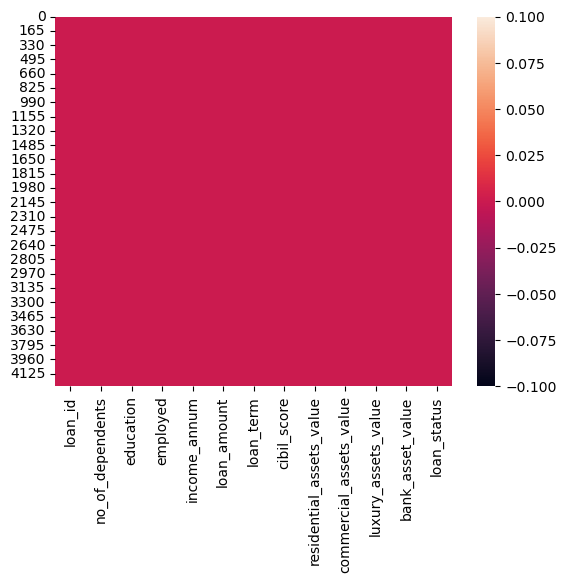

In [26]:
# Visualizing the missing data before removing null value
sns.heatmap(loan_data.isnull())

In [27]:
loan_data.tail(5)

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [28]:
# add some data in dataset
loan_data.loc[len(loan_data)]=[4270,2,'Not Graduate', 'Yes',np.nan,10000,10,300,100000.0,100000.0,np.nan,np.nan,'Approved']

In [29]:
loan_data.loc[len(loan_data)]=[4271,2,np.nan, 'Yes',np.nan,10000,10,300,100000.0,100000.0,np.nan,np.nan,np.nan]

In [30]:
loan_data.loc[len(loan_data)]=[np.nan]*len(loan_data.columns)

In [31]:
loan_data.tail(1)

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# i want to delete data where all row value is nan
loan_data.dropna(how='all',inplace=True)

In [33]:
loan_data['loan_id']=loan_data['loan_id'].astype(int) # here we change because we add nan value. nan value is by-default float data type

In [34]:
# delete row from data set.
loan_data.tail()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4266,4267,2.0,Not Graduate,No,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,Rejected
4267,4268,1.0,Not Graduate,No,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,Approved
4268,4269,1.0,Graduate,No,9200000.0,29700000.0,10.0,607.0,17800000.0,11800000.0,35700000.0,12000000.0,Approved
4269,4270,2.0,Not Graduate,Yes,NaN,10000.0,10.0,300.0,100000.0,100000.0,NaN,NaN,Approved
4270,4271,2.0,NaN,Yes,NaN,10000.0,10.0,300.0,100000.0,100000.0,NaN,NaN,NaN


In [35]:
# fill nan value in education column by using mean value of data
# education data is string type so use mode. we use mean, median for numerical data type
# here we used mode for imputy function 
loan_data['education'].fillna(loan_data['education'].mode()[0],inplace=True)

In [36]:
# here we delete two row.those row we added before 
loan_data=loan_data.drop(4269).reset_index(drop=True)
loan_data.tail()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4265,4266,0.0,Not Graduate,Yes,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,Approved
4266,4267,2.0,Not Graduate,No,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,Rejected
4267,4268,1.0,Not Graduate,No,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,Approved
4268,4269,1.0,Graduate,No,9200000.0,29700000.0,10.0,607.0,17800000.0,11800000.0,35700000.0,12000000.0,Approved
4269,4271,2.0,Graduate,Yes,NaN,10000.0,10.0,300.0,100000.0,100000.0,NaN,NaN,NaN


In [37]:
nan_column=loan_data.columns[loan_data.isnull().any()]
for i in nan_column:
    print("Columns name: ", i,":",loan_data[i].isnull().sum())

Columns name:  income_annum : 1
Columns name:  luxury_assets_value : 1
Columns name:  bank_asset_value : 1
Columns name:  loan_status : 1


In [38]:
# here we use mean for imputing
loan_data['income_annum'].fillna(loan_data['income_annum'].mean(),inplace=True)

In [39]:
# here we use median for imputing
loan_data['residential_assets_value'].fillna(loan_data['residential_assets_value'].median(),inplace=True)

In [40]:
# Here we use dropna function to delete the remaining nan value
loan_data.dropna(inplace=True)

<Axes: >

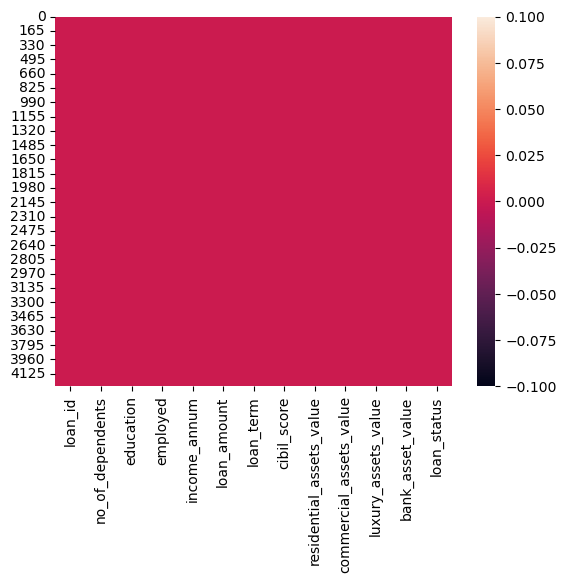

In [41]:
# Visualizing the missing data after removing null value
sns.heatmap(loan_data.isnull())

# Delete Duplicates

In [42]:
# Delete Duplicates values from datasets
loan_data[loan_data.duplicated()]

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [43]:
loan_data.duplicated().sum()

0

In [44]:
loan_data.shape

(4269, 13)

In [45]:
loan_data.drop_duplicates()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5.0,Graduate,Yes,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,Rejected
4265,4266,0.0,Not Graduate,Yes,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,Approved
4266,4267,2.0,Not Graduate,No,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,Rejected
4267,4268,1.0,Not Graduate,No,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,Approved


# Encode Categorical Data

In [46]:
loan_df=loan_data.copy()

In [47]:
loan_df.head()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [48]:
print(loan_data['education'].unique())
print(loan_data['employed'].unique())
print(loan_data['loan_status'].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [49]:
# for education column we apply encoder
education_encoder=LabelEncoder()
loan_df['education']=education_encoder.fit_transform(loan_df['education'])
# for employed column we apply encode
employed_encoder=LabelEncoder()
loan_df['employed']=employed_encoder.fit_transform(loan_df['employed'])
# for loan_status column we apply encode 
loan_encoder=LabelEncoder()
loan_df['loan_status']=loan_encoder.fit_transform(loan_df['loan_status'])

In [50]:
loan_df.head()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,0
1,2,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,4,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1


 # Handle Outlier

In [51]:
# for finding outlier on dataset we use select_dtypes method to 
numeric_cols=loan_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    q1=loan_df[col].quantile(0.25)
    q3=loan_df[col].quantile(0.75)
    IQR=q3-q1
    print("IQR value : ",IQR)
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    outliers=loan_df[(loan_df[col]<lower_bound) | (loan_df[col]>upper_bound)]
    outlier_row=outliers.any(axis=1)
    print("Total outlier:",outlier_row.sum())
    print(f"outlier in {col}: ",outliers.shape,"\n")

IQR value :  2134.0
Total outlier: 0
outlier in loan_id:  (0, 13) 

IQR value :  3.0
Total outlier: 0
outlier in no_of_dependents:  (0, 13) 

IQR value :  1.0
Total outlier: 0
outlier in education:  (0, 13) 

IQR value :  1.0
Total outlier: 0
outlier in employed:  (0, 13) 

IQR value :  4800000.0
Total outlier: 0
outlier in income_annum:  (0, 13) 

IQR value :  13800000.0
Total outlier: 0
outlier in loan_amount:  (0, 13) 

IQR value :  10.0
Total outlier: 0
outlier in loan_term:  (0, 13) 

IQR value :  295.0
Total outlier: 0
outlier in cibil_score:  (0, 13) 

IQR value :  9100000.0
Total outlier: 52
outlier in residential_assets_value:  (52, 13) 

IQR value :  6300000.0
Total outlier: 37
outlier in commercial_assets_value:  (37, 13) 

IQR value :  14200000.0
Total outlier: 0
outlier in luxury_assets_value:  (0, 13) 

IQR value :  4800000.0
Total outlier: 5
outlier in bank_asset_value:  (5, 13) 

IQR value :  1.0
Total outlier: 0
outlier in loan_status:  (0, 13) 



In [52]:
# for finding outlier on dataset we use select_dtypes method to 
numeric_cols=loan_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    z = np.abs(stats.zscore(loan_df[col]))
    outliers=loan_df[(abs(z)>3)]
    outlier_row=outliers.any(axis=1)
    print("Total outlier:",outlier_row.sum())
    print(f"Outlier using z-szore: {col}:",outliers.shape)

Total outlier: 0
Outlier using z-szore: loan_id: (0, 13)
Total outlier: 0
Outlier using z-szore: no_of_dependents: (0, 13)
Total outlier: 0
Outlier using z-szore: education: (0, 13)
Total outlier: 0
Outlier using z-szore: employed: (0, 13)
Total outlier: 0
Outlier using z-szore: income_annum: (0, 13)
Total outlier: 0
Outlier using z-szore: loan_amount: (0, 13)
Total outlier: 0
Outlier using z-szore: loan_term: (0, 13)
Total outlier: 0
Outlier using z-szore: cibil_score: (0, 13)
Total outlier: 16
Outlier using z-szore: residential_assets_value: (16, 13)
Total outlier: 17
Outlier using z-szore: commercial_assets_value: (17, 13)
Total outlier: 0
Outlier using z-szore: luxury_assets_value: (0, 13)
Total outlier: 0
Outlier using z-szore: bank_asset_value: (0, 13)
Total outlier: 0
Outlier using z-szore: loan_status: (0, 13)


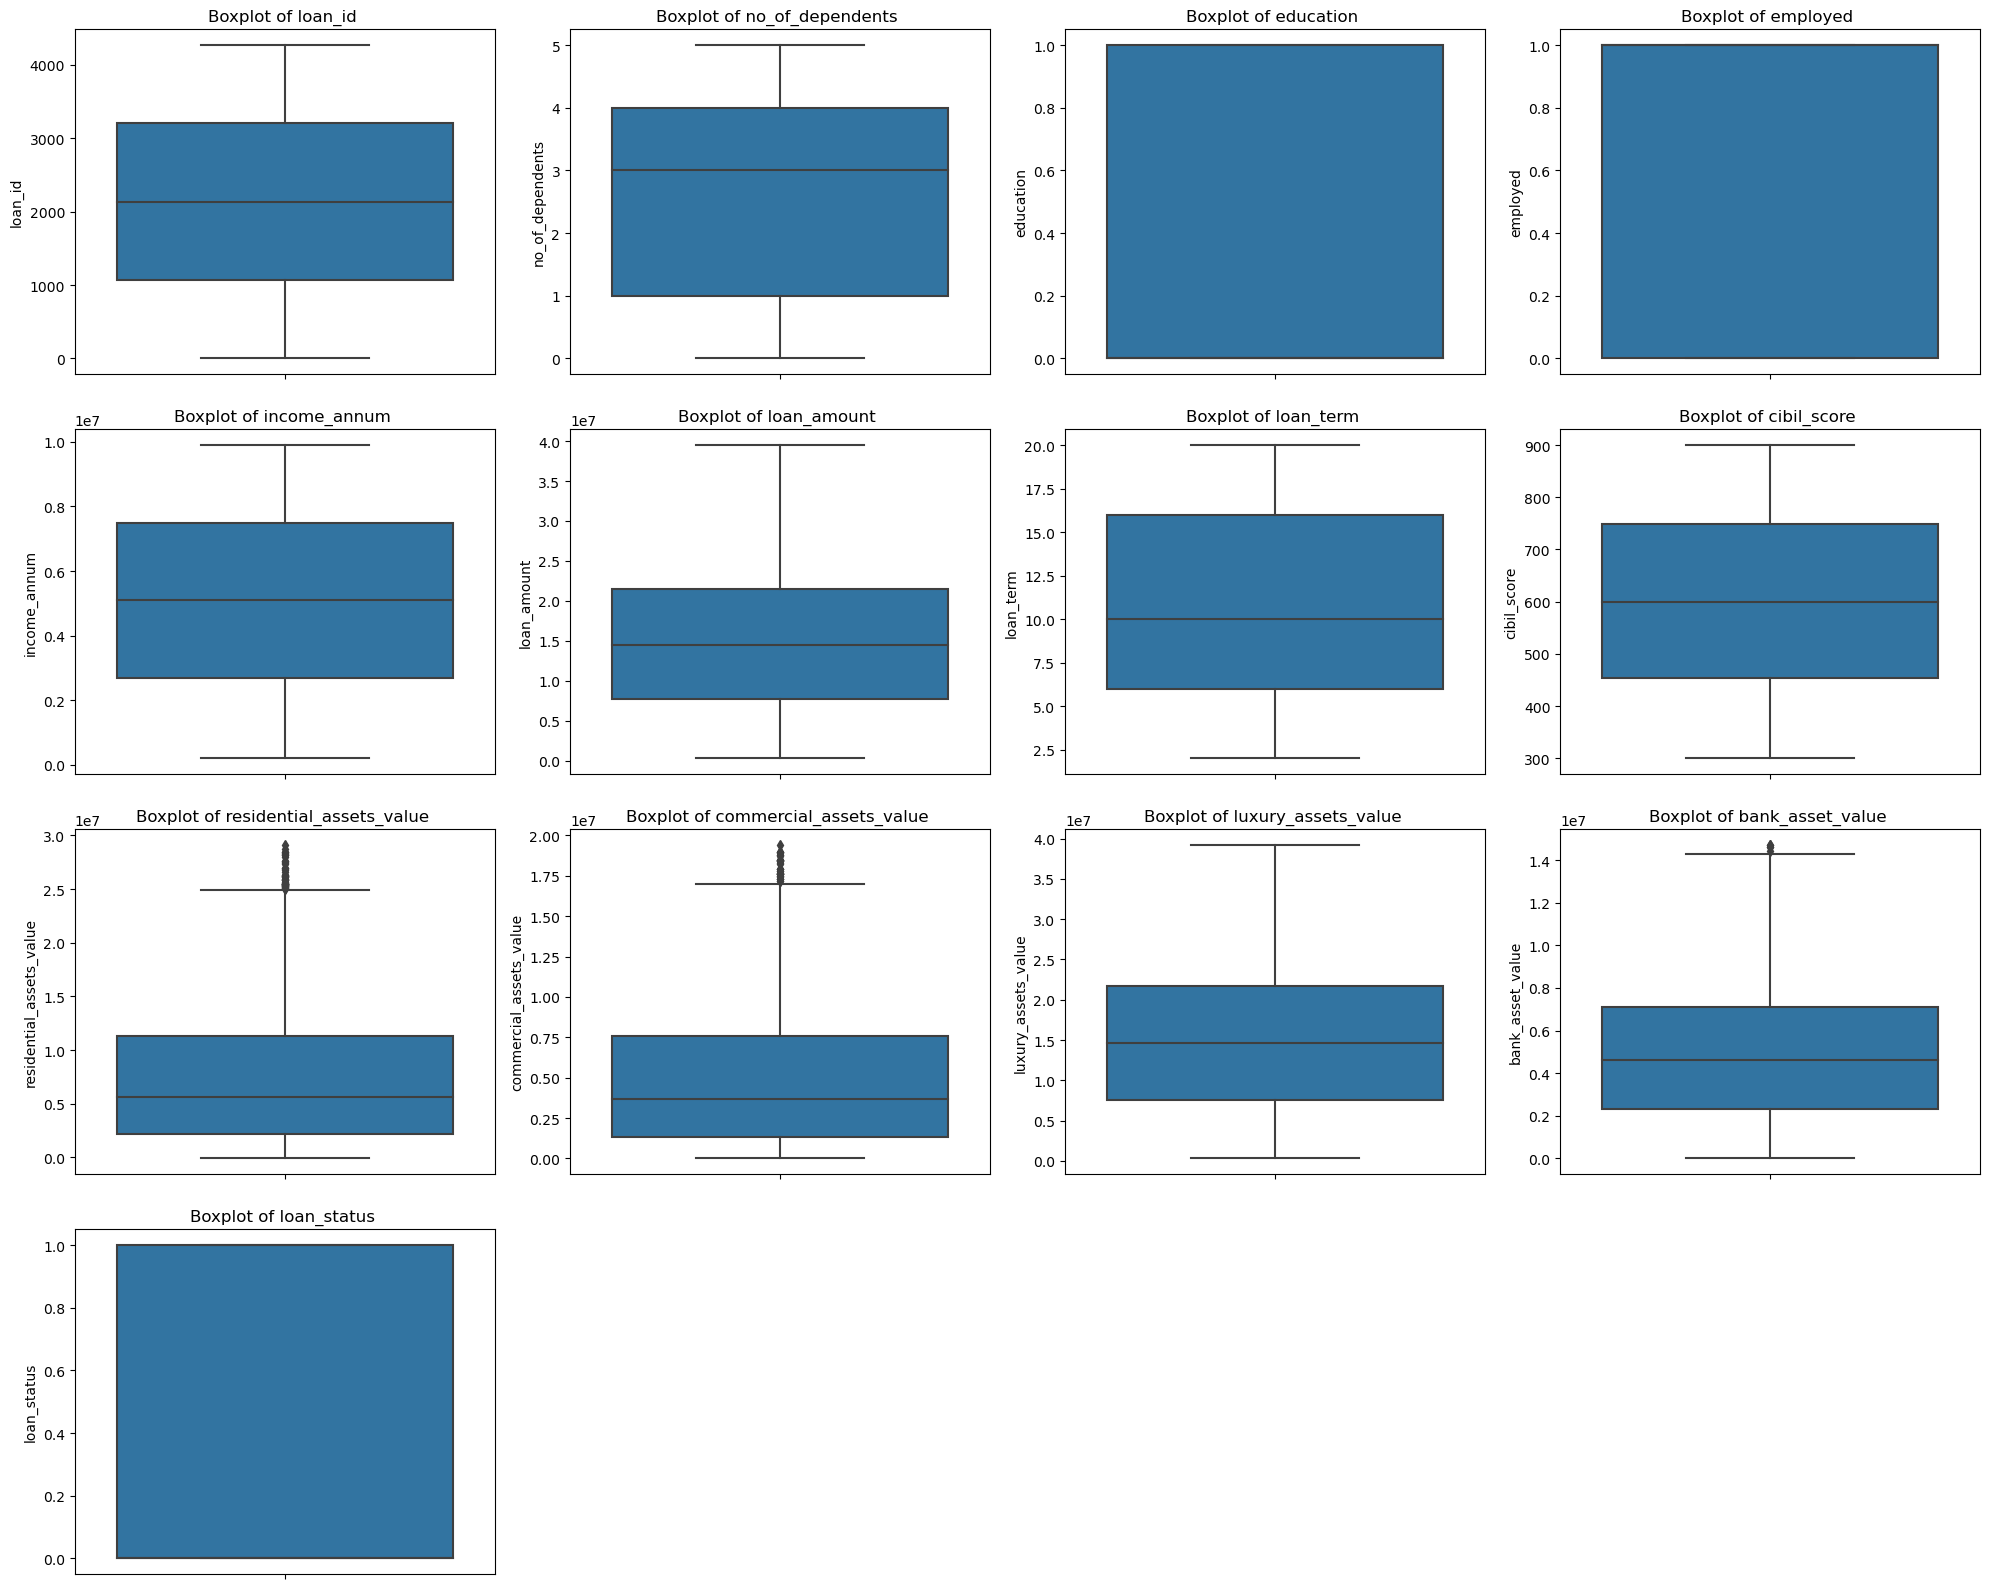

In [53]:
# showing outlier using box plot
# Assuming `loan_df` is your DataFrame and `numeric_cols` contains numeric column names
numeric_cols=loan_df.select_dtypes(include=['number']).columns
# set number of columns per row
plots_per_row=4
#calculate number of rows needed
num_rows=(len(numeric_cols)+plots_per_row-1)//plots_per_row
# Create subplots
fig,axes=plt.subplots(num_rows,plots_per_row,figsize=(5*plots_per_row,4*num_rows))
# Flatten axes if it's a 2D array
if len(numeric_cols) > 1:
    axes = axes.flatten()
else:
    axes = [axes] # Ensure it's iterable for a single column
# Loop through numeric columns and axes
for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=loan_df[col],ax=ax)
    ax.set_title(f'Boxplot of {col} ')
# remove unused subplots if any
for i in range(len(numeric_cols),len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [54]:
# outlier using quertile
# for finding outlier on dataset we use select_dtypes method to 
# outlier using quertile
df=loan_df.copy()
numeric_cols=df.select_dtypes(include=['number']).columns
q1=df[numeric_cols].quantile(0.25)
q3=df[numeric_cols].quantile(0.75)
IQR=q3-q1
outliers=((df[numeric_cols]<(q1-1.2*IQR)) |(df[numeric_cols]>(q3+1.2*IQR)))
outlier_row=outliers.any(axis=1)
print(f"number of outliers detected:{outlier_row.sum()}")

number of outliers detected:312


In [55]:
#Remove outlier
df_cleaned=df[~outlier_row].reset_index(drop=True)
print(f"original dataset shape: {df.shape}")
print(f"cleaned dataset shape: {df_cleaned.shape}")

original dataset shape: (4269, 13)
cleaned dataset shape: (3957, 13)


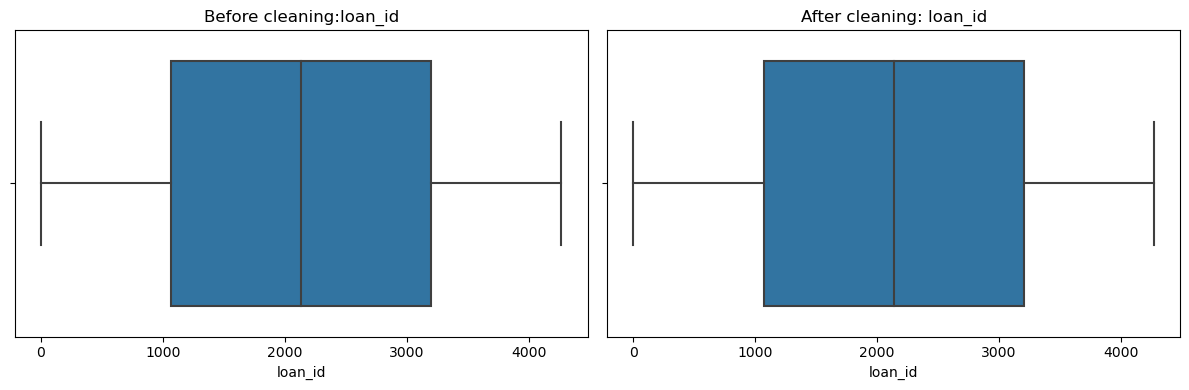

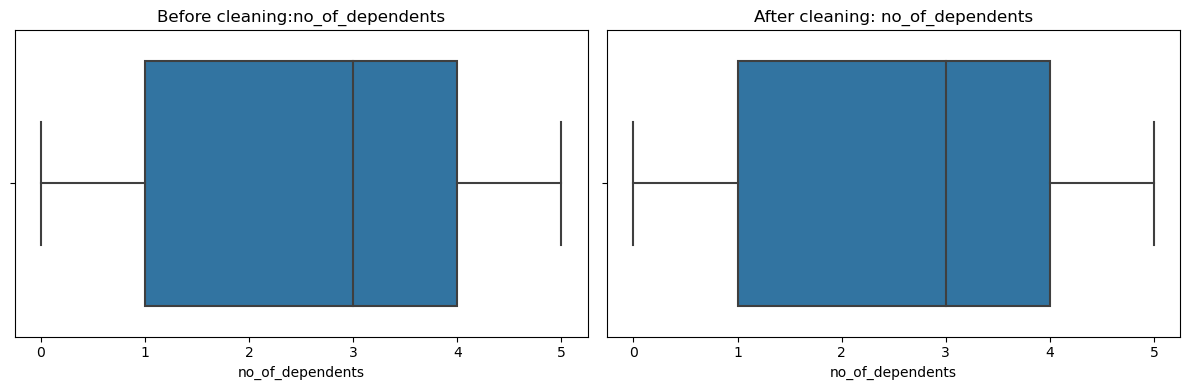

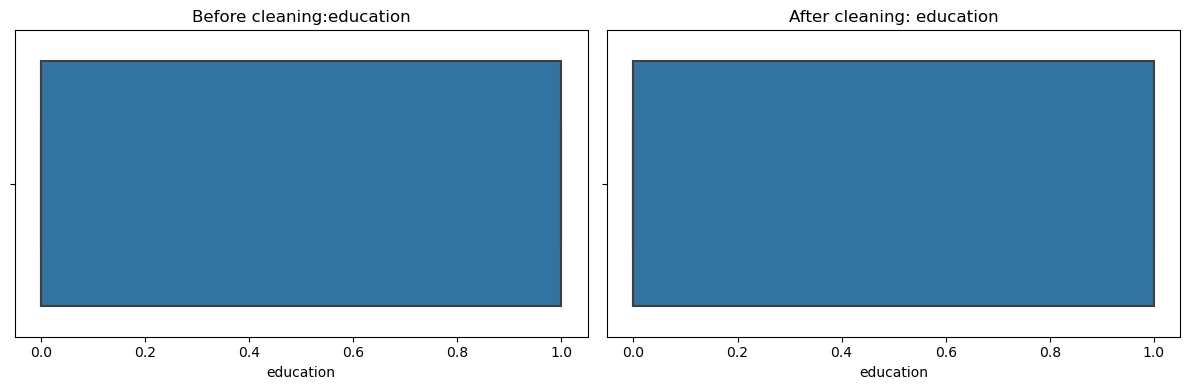

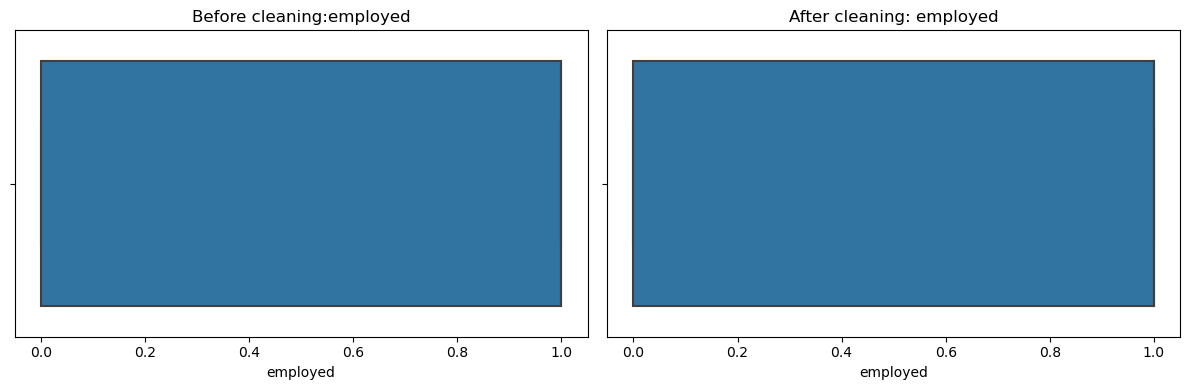

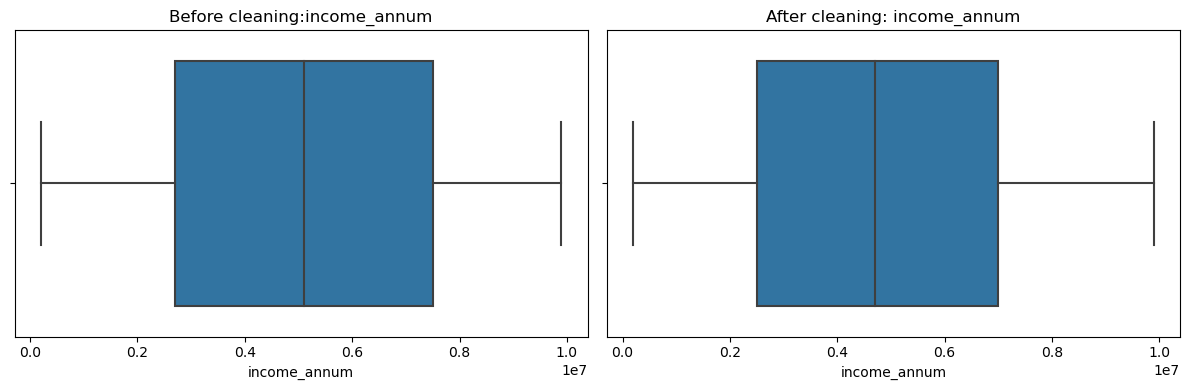

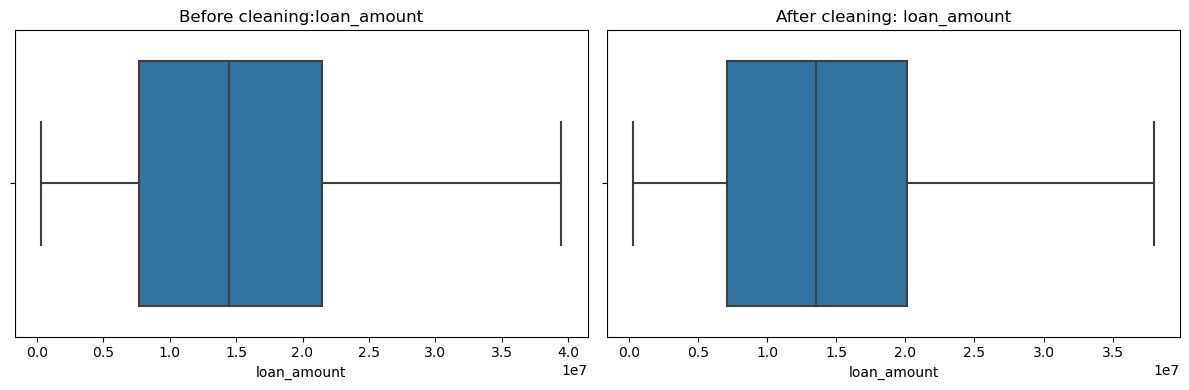

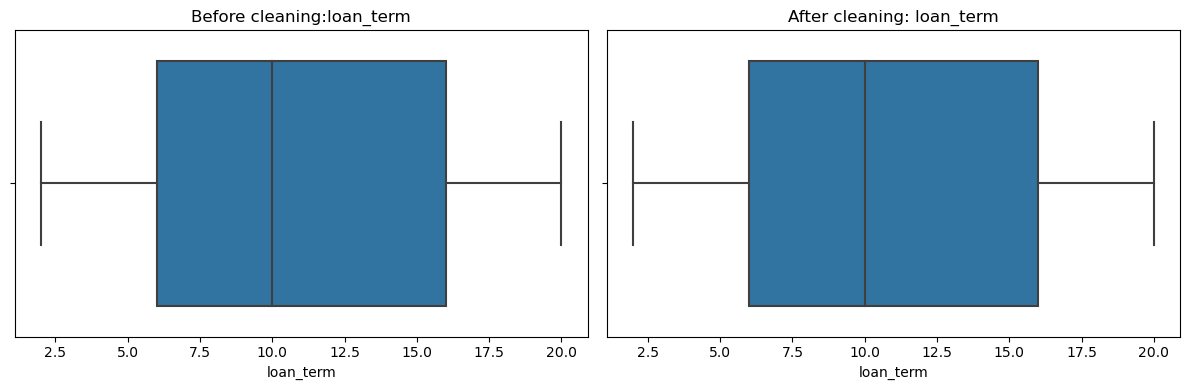

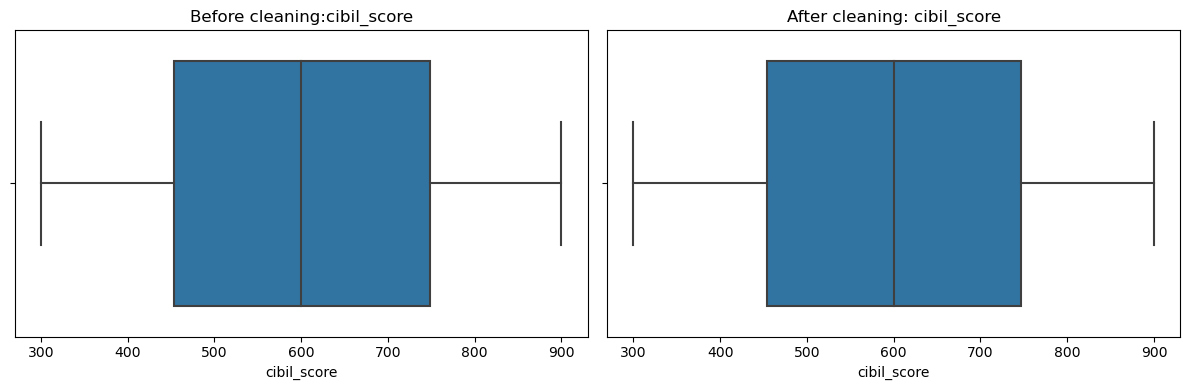

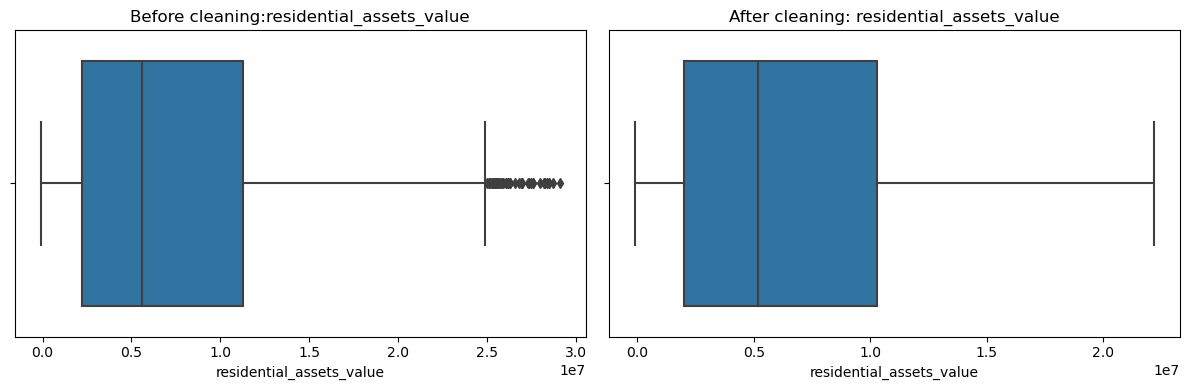

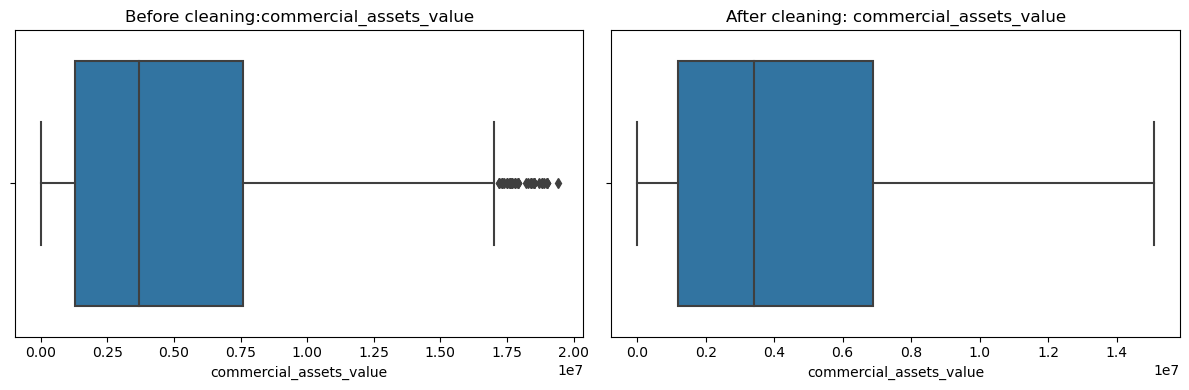

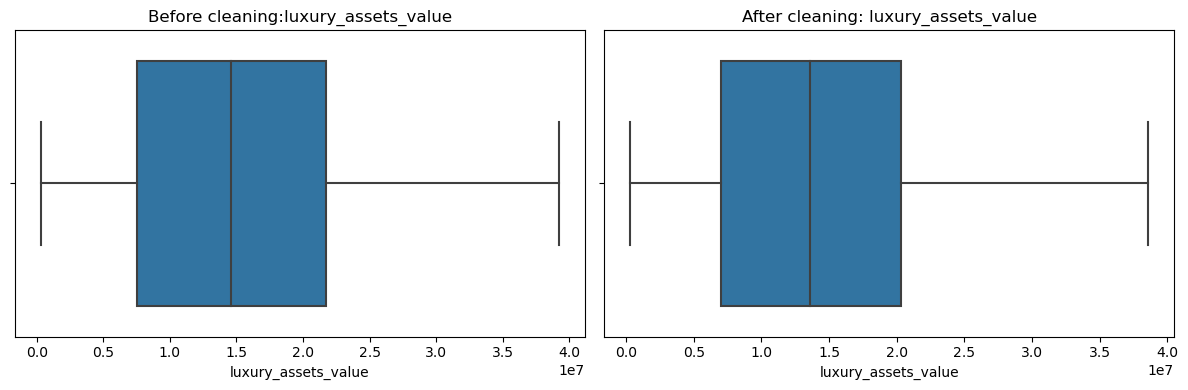

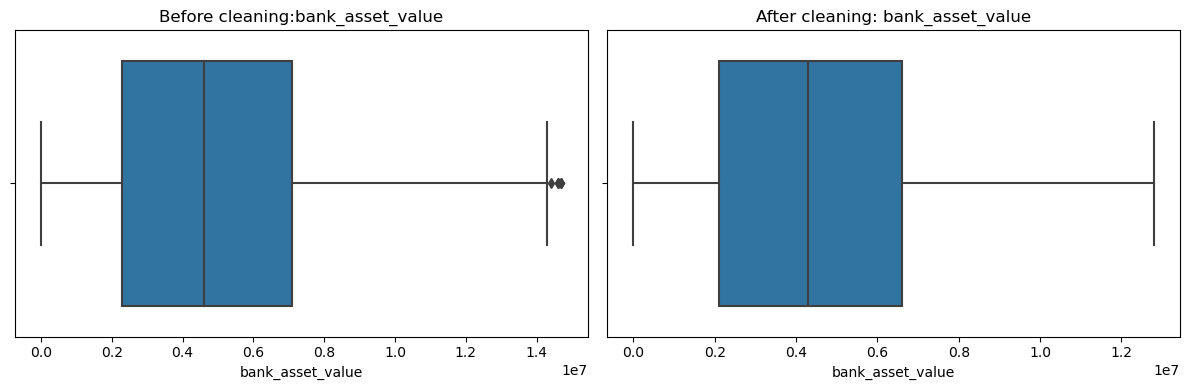

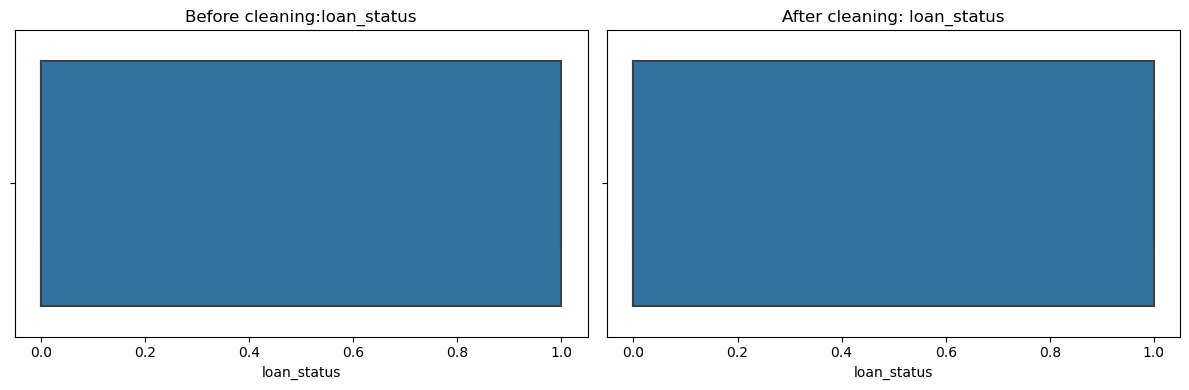

In [56]:
for feature in numeric_cols:
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    sns.boxplot(x=df[feature],ax=axes[0])
    axes[0].set_title(f"Before cleaning:{feature}")
    sns.boxplot(x=df_cleaned[feature],ax=axes[1])
    axes[1].set_title(f"After cleaning: {feature}")
    plt.tight_layout()
    plt.show()

In [57]:
df_cleaned.head()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
1,3,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
2,4,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
3,5,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1
4,6,0.0,0,1,4800000.0,13500000.0,10.0,319.0,6800000.0,8300000.0,13700000.0,5100000.0,1


# Binning



 Binning data is a common technique in data analysis where you group continuous data into categorical intervals, or bins, to gain insights into the distribution or trends within the data.

In [58]:
# Example of binning for cibil_score
df_cleaned['cibil_score_bin']=pd.cut(df_cleaned['cibil_score'],bins=[300,600,700,850],labels=['Poor','Average','Good'])

In [59]:
#Binning loan_amount
df_cleaned['loan_amount_bin']=pd.cut(df_cleaned['loan_amount'],bins=5)
#Binning income_annum
df_cleaned['income_bin']=pd.cut(df_cleaned['income_annum'],bins=3,labels=['low Salary','Medium Salary','High Salary'])
#Binning loan_term
df_cleaned['loan_term_bin']=pd.cut(df_cleaned['loan_term'],bins=[0,5,10,15,20,30],labels=['<5','5-10','10-15','15-20','20-30'])

In [60]:
df_cleaned['loan_amount_bin'].head()

0     (7840000.0, 15380000.0]
1    (22920000.0, 30460000.0]
2    (30460000.0, 38000000.0]
3    (22920000.0, 30460000.0]
4     (7840000.0, 15380000.0]
Name: loan_amount_bin, dtype: category
Categories (5, interval[float64, right]): [(262300.0, 7840000.0] < (7840000.0, 15380000.0] < (15380000.0, 22920000.0] < (22920000.0, 30460000.0] < (30460000.0, 38000000.0]]

In [61]:

df_cleaned['income_annum'].min()

200000.0

# Normalization



Data normalization is the process of scaling numeric features to a standard range, preventing large values from dominating the learning process in machine learning models<br>
The MinMaxScaler() function scales each feature to a given range, typically [0, 1]

In [62]:
scaler=MinMaxScaler()
df_cleaned[['loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','income_annum']]=scaler.fit_transform(df_cleaned[['loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','income_annum']])

# Visualisation

# Line Plot

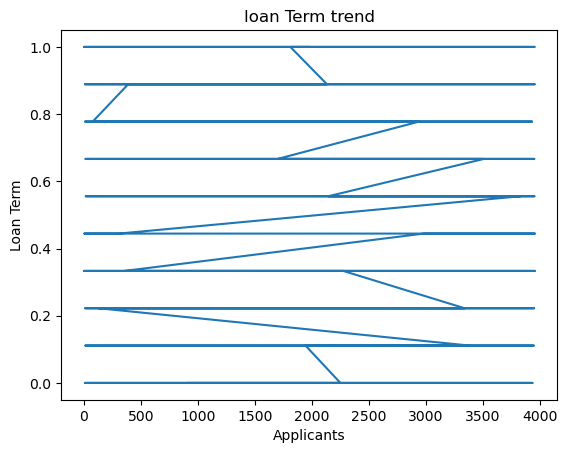

In [63]:
# Basic plot: line plot
df_sorted=df_cleaned.sort_values('loan_term')
plt.plot(df_sorted['loan_term'])
plt.title("loan Term trend")
plt.xlabel("Applicants")
plt.ylabel("Loan Term")
plt.show()

Inference:<br>
It basically show all sorted loan Applicants on the basis of loan Term. It basically show more people intrested in taking loan for upto 4 to 6 years

# Bar Plot

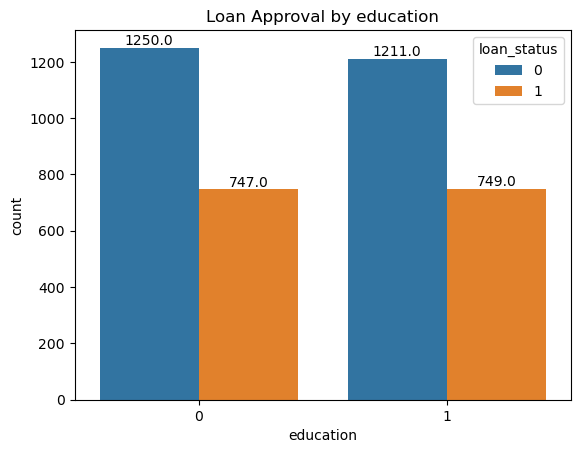

In [64]:
# bar plot
ax=sns.countplot(x='education',hue='loan_status',data=df_cleaned)
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',(p.get_x()+p.get_width()/2.,height),ha='center',va='bottom')
plt.title('Loan Approval by education')
plt.show()

Inference:-<br>
According to bank policies graduates have higher chance to approval loan by bank. 

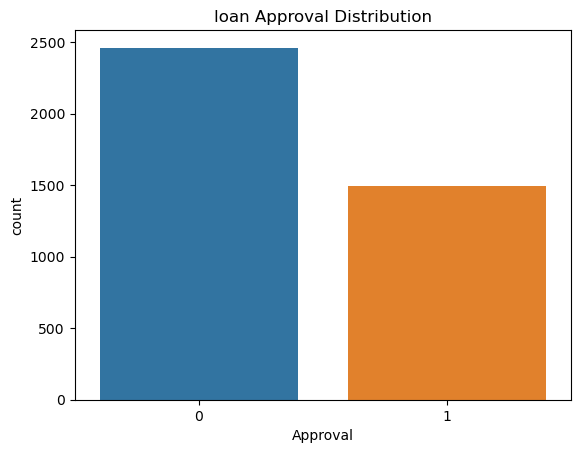

In [65]:
sns.countplot(x='loan_status',data=df_cleaned)
plt.title("loan Approval Distribution")
plt.xlabel("Approval")
plt.ylabel("count")
plt.show()

Inference:- <br>
The Majority of application are rejected, with a lesser number Approved. This shows the bank's rejection rate is higher than its Approval rate rate.

# Histogram

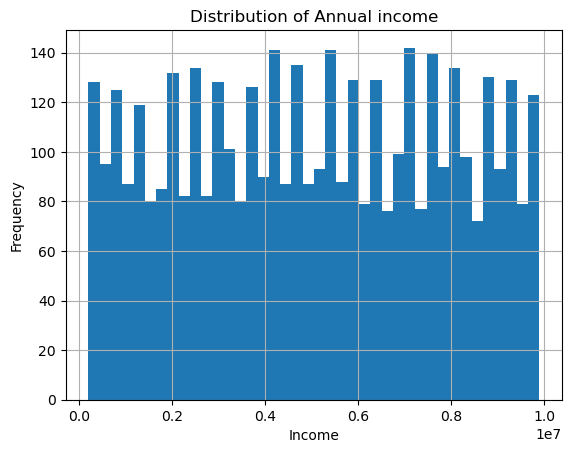

In [66]:
#histogram
df['income_annum'].hist(bins=40)
plt.title("Distribution of Annual income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Inference:-<br>
The Distribution of annual income is right skewed, meaning most people earn less, with a few high earner. This might indicated income inequality within the application pool.

 Skewness is a key statistical measure that shows how data is spread out in a dataset. It tells us if the data points are skewed to the left (negative skew) or to the right (positive skew) in relation to the mean. It is important because it helps us to understand the shape of the data distribution which is important for accurate data analysis and helps in identifying outliers and finding the best statistical methods to use for analysis.
1. Positive Skewness (Right Skew)
In a positively skewed distribution, the right tail is longer than the left which means most data points are on the left with a few large values pulling the distribution to the right.
Relationship:
Mean > Median > Mode
2. Negative Skewness (Left Skew)
In a negatively skewed distribution, the left tail is longer which means most data points are on the right with a few smaller values pulling the distribution to the left.
Relationship:
Mean < Median < Mode
3. Zero Skewness (Symmetrical Distribution)
Zero skewness shows a perfectly symmetrical distribution where the mean, median and mode are equal. In a symmetrical distribution, the data points are evenly distributed around the central point.
Relationship:
Mean = Median = Mode


# Box Plot

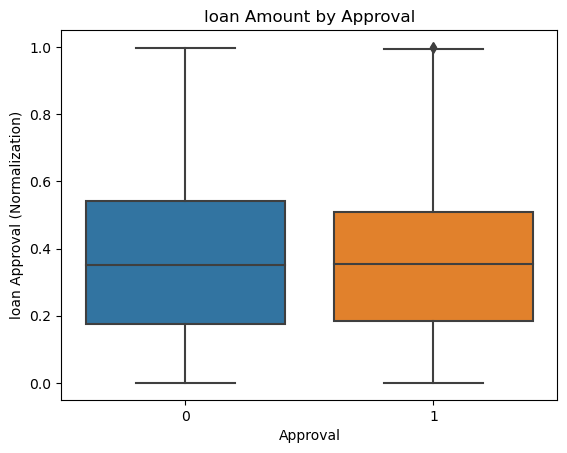

In [67]:
#Box plot
sns.boxplot(x='loan_status',y='loan_amount',data=df_cleaned)
plt.title("loan Amount by Approval")
plt.xlabel("Approval")
plt.ylabel("loan Approval (Normalization)")
plt.show()

Inference:-<br>
The box plot shows that the median loan amount is higher for approval loans. there are a few outliers with very large amount, which might corresspond to special cases or high-risk application

# Area Plot

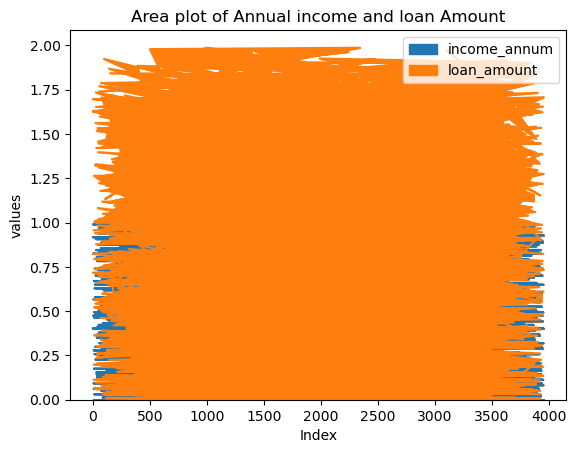

In [68]:
#Area Plot
df_cleaned[['income_annum','loan_amount']].sort_values(by='income_annum').plot.area()
plt.title("Area plot of Annual income and loan Amount")
plt.xlabel("Index")
plt.ylabel("values")
plt.show()

 Inference:- <br>
This Area plot illurstrate the cummulative distribution of Annual Income and loan amount. we observe a clear upward trend-higher income typically comes alongside larger loans.

# Scatter Plot

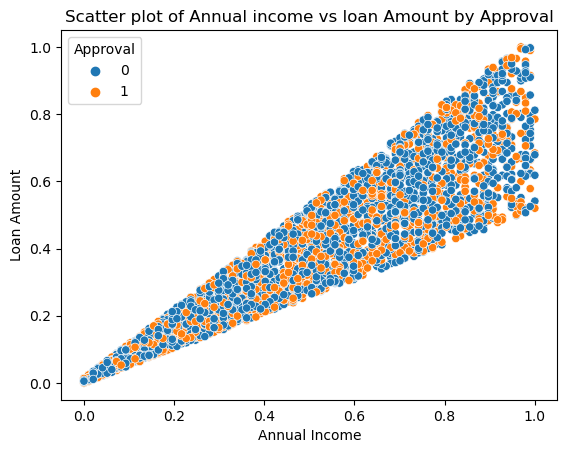

In [69]:
#Scatter Plot
sns.scatterplot(x='income_annum',y='loan_amount',hue='loan_status',data=df_cleaned)
plt.title("Scatter plot of Annual income vs loan Amount by Approval")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.legend(title='Approval')
plt.show()

Inference:-<br>
This scatter plot shows a positive correlation between annual income and loan amount.Approved application are predominantly in  the higher income and higher amount quadrant, while non-approval ones are more dispersed at lower values


# Hexagonal Bin Plot

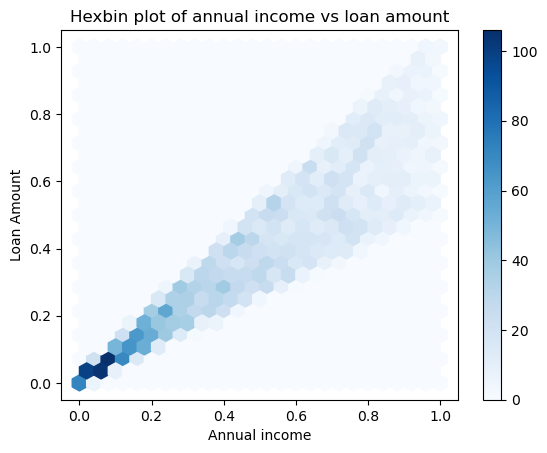

In [70]:
#Hexbin Plot
df_cleaned.plot.hexbin(x='income_annum',y='loan_amount',gridsize=25,cmap='Blues')
plt.title("Hexbin plot of annual income vs loan amount")
plt.xlabel("Annual income")
plt.ylabel("Loan Amount")
plt.show()

Inference:-<br>
 This hexbin plot highlights the connection of data point. The densest cluster are the lower income and lower loan which resonattes with our observation from the scatter plot.

# Pie Chart

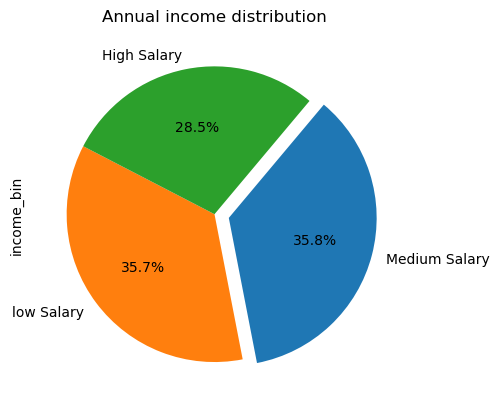

In [71]:
explode=[0.1,0,0]
df_cleaned['income_bin'].value_counts().plot.pie(autopct='%1.1f%%',counterclock=False,startangle=50,explode=explode)
plt.title("Annual income distribution")
plt.show()

inference:-<br>
The Pie chart shows the residential assets value which are divided into three categories of high, low and medium. More people earn medium salary and lower salary. fewer people lies in higher salary range.

# HeatMap

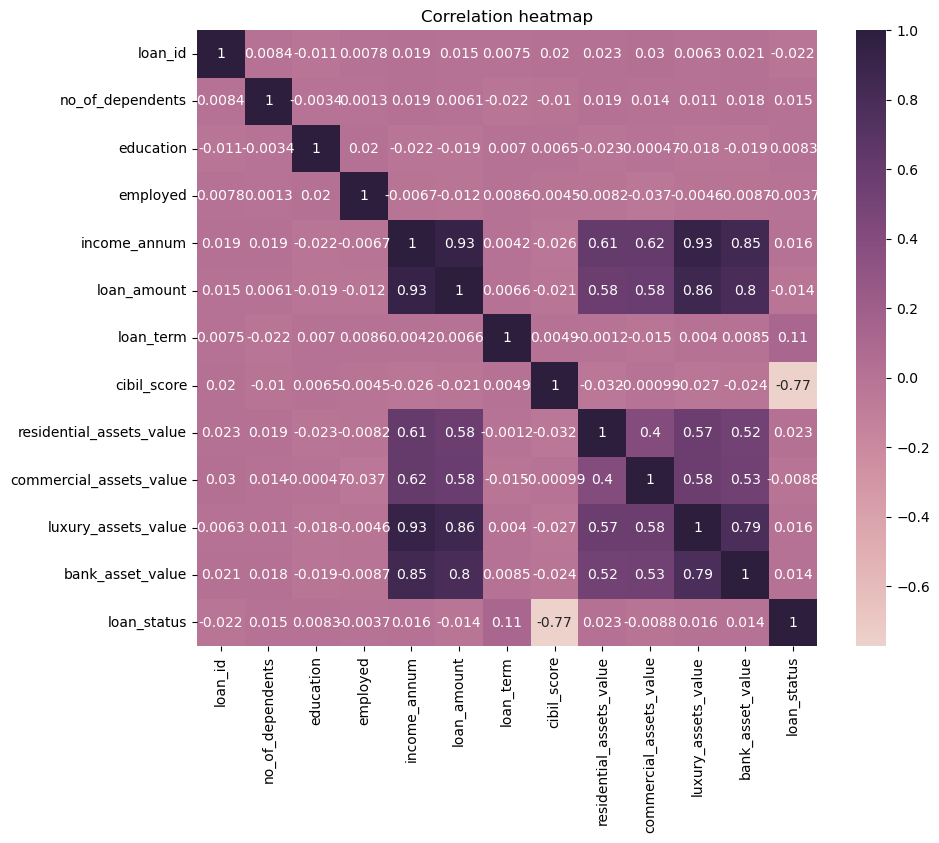

In [72]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation heatmap")
plt.show()

Inference:-<br>
According to the correlation graph, loan status is significantly influenced by factors such as education level, employemnt status, and residential asset value. Individual with higher annual income also tend to own more residential, commerical and luxury assets. Additionally, the loan amount is strongly correlated with annual income, indicating that higher earners are eligible for longer loans.

In [73]:
# for education column we apply encoder
income_encoder=LabelEncoder()
df_cleaned['income_bin']=income_encoder.fit_transform(df_cleaned['income_bin'])
# for employed column we apply encode
cibil_encoder=LabelEncoder()
df_cleaned['cibil_score_bin']=cibil_encoder.fit_transform(df_cleaned['cibil_score_bin'])
loan_amount_encoder=LabelEncoder()
df_cleaned['loan_amount_bin']=loan_amount_encoder.fit_transform(df_cleaned['loan_amount_bin'])
loan_term_encoder=LabelEncoder()
df_cleaned['loan_term_bin']=loan_term_encoder.fit_transform(df_cleaned['loan_term_bin'])

In [74]:
df_cleaned.head()

,loan_id,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score_bin,loan_amount_bin,income_bin,loan_term_bin
0,2,0.0,1,1,0.402062,0.315650,0.333333,0.195000,0.125561,0.145695,0.221932,0.257812,1,2,1,1,2
1,3,3.0,0,0,0.917526,0.779841,1.000000,0.343333,0.322870,0.298013,0.861619,1.000000,1,2,3,0,1
2,4,3.0,0,0,0.824742,0.806366,0.333333,0.278333,0.820628,0.218543,0.600522,0.617188,1,2,4,0,2
3,5,5.0,1,1,0.989691,0.633952,1.000000,0.136667,0.560538,0.543046,0.759791,0.390625,1,2,3,0,1
4,6,0.0,0,1,0.474227,0.350133,0.444444,0.031667,0.309417,0.549669,0.349869,0.398438,1,2,1,1,2


In [75]:
df_cleaned=df_cleaned.drop(['loan_id','cibil_score_bin','loan_amount_bin','income_bin','loan_term_bin'],axis=1)
df_cleaned.head()

,no_of_dependents,education,employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.0,1,1,0.402062,0.315650,0.333333,0.195000,0.125561,0.145695,0.221932,0.257812,1
1,3.0,0,0,0.917526,0.779841,1.000000,0.343333,0.322870,0.298013,0.861619,1.000000,1
2,3.0,0,0,0.824742,0.806366,0.333333,0.278333,0.820628,0.218543,0.600522,0.617188,1
3,5.0,1,1,0.989691,0.633952,1.000000,0.136667,0.560538,0.543046,0.759791,0.390625,1
4,0.0,0,1,0.474227,0.350133,0.444444,0.031667,0.309417,0.549669,0.349869,0.398438,1


In [76]:
# Train model
x=df_cleaned.drop(columns=['loan_status'])
y=df_cleaned['loan_status']

In [77]:

import joblib

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [79]:
# predict on X_test(from train_test_split)
joblib.dump(model,"load_model.pkl")
print("model saved as loan_model.pkl")
y_pred=model.predict(x_test)
y_pred.shape

model saved as loan_model.pkl


(792,)

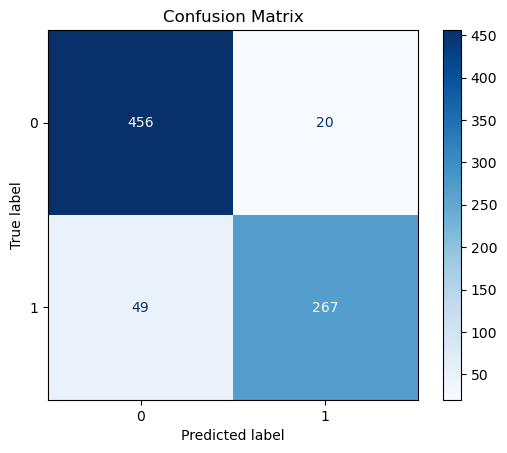

Confusion Matrix [[456  20]
 [ 49 267]]


In [80]:
#show Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix",cm)

Inference:<br>
total True negative is 467<br>
total false positive is 39<br>
total false negative is 16 <br>
total positive is 269<br>

Confusion Matrix:
A confusion matrix is a table used to evaluate the performance of classification model especially in binary and multi-class classification <br>
                 predicted<br>
                  0      1 <br>
 Actual value  0  TN     FP<br>
               1  FP    TP <br>
 TP (True Positive): model predicted 1(positive and actual is also 1)<br>
 TN ( True Negative): Model predicted 0(negative) and actual is also 0)<br>
 FP ( False Positive): Model predicted 1 but actual is 0( type | error)<br>
 FN ( False Negative): Model predicted 0 but acutal is 1 ( type| error)<br>

In [81]:
# show Accuracy, score and classification report
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%")
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy Score: 0.9128787878787878
Accuracy: 91.29%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       476
           1       0.93      0.84      0.89       316

    accuracy                           0.91       792
   macro avg       0.92      0.90      0.91       792
weighted avg       0.91      0.91      0.91       792



Classification Report:<br>
A classification report summarizes the performance of a classification model using key metrics for each class. <br>
Precision: out of all predicted positive , how many were actually correct (TP/(TP+FP))<br>
Recall: out of all actual positives, how many did the model correct identity?(TP/(TP+FN)) <br>
 F1-score: Balance between precision and recall (2*(precision * recall)/(precision+recall)) <br>
support: Number of actual instance for each class in the test set <br>
Accuracy: (TP+TN)/Total overall how many prediction were correct<br>
Macro Avg: Average of precision , recall, f1-score across all classess equally. <br>
weighted Avg: Average of precision , recall , f1-score weighted by support(sample count)

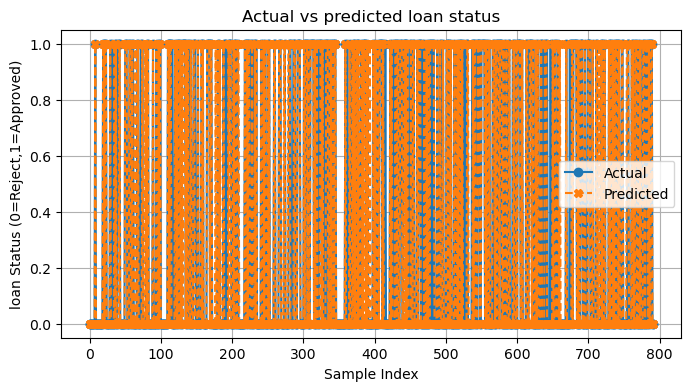

In [82]:
# Plot Graph: Actual vs prediction
plt.figure(figsize=(8,4))
plt.plot(list(range(len(y_test))),y_test.values,marker='o',label="Actual")
plt.plot(list(range(len(y_pred))),y_pred,marker='X',label="Predicted",linestyle='dashed')
plt.title("Actual vs predicted loan status")
plt.xlabel("Sample Index")
plt.ylabel("loan Status (0=Reject,1=Approved)")
plt.legend()
plt.grid()
plt.show()

In [83]:
# For User:
def predict_loan_status(user_input):
    user_df=pd.DataFrame([user_input])
    prediction=model.predict(user_df)[0]
    return "Loan Approved" if prediction==1 else "Loan Rejected"

In [84]:
df_cleaned.columns

Index(['no_of_dependents', 'education', 'employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

# for User input

In [ ]:
# take user input:
user_input={
    'no_of_dependents':int(input("Enter your number of dependents: ")),
    'education':int(input("Enter your education status(if Graduate then enter 1 otherwise 0): ")),
    'employed':int(input("Enter your employed status(if employed press 1 otherwise 0): ")),
    'income_annum':int(input("Enter your per annum income: ")),
    'loan_amount':int(input("Enter your loan amount: ")),
    'loan_term':int(input("Enter your loan term: ")),
    'cibil_score':int(input("Enter your cibil score(300-1000): ")),
    'residential_assets_value':int(input("Enter your Residential assets: ")),
    'commercial_assets_value':int(input("Enter your commercial assets value: ")),
    'luxury_assets_value':int(input("Enter your luxury assets value: ")),
    'bank_asset_value':int(input("Enter your bank assets value: ")),


}
print(predict_loan_status(user_input))

Enter your number of dependents: 2
Enter your education status(if Graduate then enter 1 otherwise 0): 1
Enter your employed status(if employed press 1 otherwise 0): 1
